In [2]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_images(folder_path, image_size=(64, 64)):
    image_data = []

    # Iterate through each directory in the main folder
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Iterate through each file in the subdirectory
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    # If the file is an image file, load, resize, convert to array, and normalize
                    image = Image.open(file_path)
                    image = image.resize(image_size)  # Resize the image
                    image_array = np.array(image) / 255.0  # Convert to array and normalize
                    image_data.append(image_array)

    # Convert the list of arrays to a numpy array
    image_data = np.array(image_data)

    return image_data

folder_path = r'C:\Users\jetxu\Downloads\Gender\Dataset\Train'
images = preprocess_images(folder_path)

In [3]:
# Define the ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Create a generator for the images in your folder
image_generator = train_datagen.flow_from_directory(
    folder_path,  # directory containing your images
    target_size=(64, 64),  # resize images to 64x64
    batch_size=32,
    class_mode='binary'  # assuming binary classification
)

Found 22598 images belonging to 2 classes.


In [5]:
# Generate some augmented images along with their labels
augmented_images, labels = [], []
for _ in range(5):  # Generate 5 augmented batches
    batch = next(image_generator)
    augmented_images.extend(batch[0])
    labels.extend(batch[1])

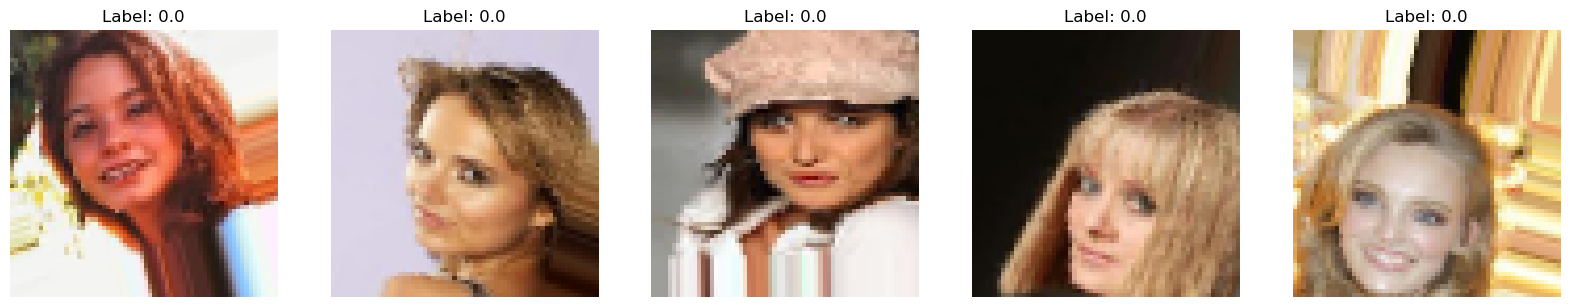

In [6]:
import matplotlib.pyplot as plt
# Display the augmented images along with their labels
num_images_to_display = min(5, len(augmented_images))  # Ensure we don't try to display more images than available
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
for i, (image, label) in enumerate(zip(augmented_images[:num_images_to_display], labels[:num_images_to_display])):
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')  # Assuming binary classification (0 or 1)

plt.show()

In [7]:
# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Iterate through each subdirectory (each class)
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Count the number of images in the subdirectory
        num_images = len(os.listdir(subdir_path))
        class_counts[subdir] = num_images


In [8]:
# Display the total number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'Female' has 13778 images.
Class 'Male' has 8820 images.


In [9]:
# Find the minimum number of images among all classes
min_num_images = min(class_counts.values())

In [10]:
import os
import shutil
import random

# Define the original folder containing the images
original_folder_path = r'C:\Users\jetxu\Downloads\Gender\Dataset\Train'

# Define the target folder where the balanced dataset will be stored
balanced_folder_path = r'C:\Users\jetxu\Downloads\Gender\balanced_train'

# Define the number of images to keep for each class
num_images_per_class = 1800

# Create the target folder if it doesn't exist
os.makedirs(balanced_folder_path, exist_ok=True)

# Iterate through each class folder
for class_name in os.listdir(original_folder_path):
    class_folder_path = os.path.join(original_folder_path, class_name)
    target_class_folder_path = os.path.join(balanced_folder_path, class_name)
    os.makedirs(target_class_folder_path, exist_ok=True)
    
    # Randomly select a subset of images
    all_images = os.listdir(class_folder_path)
    selected_images = random.sample(all_images, min(len(all_images), num_images_per_class))
    
    # Copy the selected images to the target folder
    for image_name in selected_images:
        source_path = os.path.join(class_folder_path, image_name)
        target_path = os.path.join(target_class_folder_path, image_name)
        shutil.copyfile(source_path, target_path)

print("Balanced dataset created successfully.")


Balanced dataset created successfully.


In [11]:
# Define the target folder where the balanced dataset will be stored
import os
balanced_folder_path = r'C:\Users\jetxu\Downloads\Gender\balanced_train'
os.makedirs(balanced_folder_path, exist_ok=True)

In [12]:

# Initialize a dictionary to store the count of images for each class in the balanced dataset
balanced_class_counts = {}

# Iterate through each subdirectory (each class) in the balanced dataset and count the number of images
for class_name in os.listdir(balanced_folder_path):
    class_path = os.path.join(balanced_folder_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        balanced_class_counts[class_name] = num_images

# Display the count of images for each class in the balanced dataset
print("Class-wise image counts in the balanced dataset:")
for class_name, count in balanced_class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class-wise image counts in the balanced dataset:
Class 'Female' has 1800 images.
Class 'Male' has 1800 images.


In [13]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [14]:
Categories=['Female','Male']
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir=r'C:\Users\jetxu\Downloads\Gender\balanced_train' 
#path which contains all the categories of images 
for i in Categories: 
      
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

loading... category : Female
loaded category:Female successfully
loading... category : Male
loaded category:Male successfully


In [15]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(3600, 67501)

In [16]:
#input data  
x=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Training set predictions and accuracy
train_predictions = rf_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Validation set predictions and accuracy
val_predictions = rf_classifier.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Test set predictions and accuracy
test_predictions = rf_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.8680555555555556
Test Accuracy: 0.8958333333333334


In [19]:
# Testing the model using the testing data 
y_pred = rf_classifier.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 89.58333333333334% accurate


In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100],# Reduce the number of trees
    'max_depth': [None, 10],# Limit the depth of trees
    'min_samples_split': [2, 5], # Adjust minimum samples required to split a node
    'min_samples_leaf': [1, 2]  #Adjust minimum samples required to be a leaf node
}c

# Initialize RandomizedSearchCV with reduced parameters and folds
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best Score: 0.8788194444444444


In [21]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_predictions = rf_classifier.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, test_predictions, target_names=Categories))


Classification Report:
              precision    recall  f1-score   support

      Female       0.97      0.82      0.89        72
        Male       0.84      0.97      0.90        72

    accuracy                           0.90       144
   macro avg       0.91      0.90      0.90       144
weighted avg       0.91      0.90      0.90       144



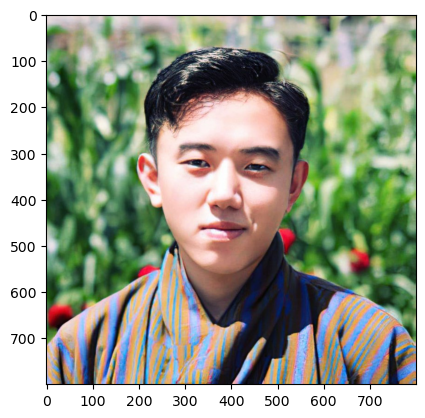

Female = 35.0%
Male = 65.0%
The predicted image is: Male


In [22]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained RandomForestClassifier
# Assuming Categories contains your class labels

path = r"C:\Users\jetxu\Downloads\Gender\1.JPEG"
img = imread(path)

plt.imshow(img)
plt.show()

img_resize = resize(img, (150, 150, 3))  # Resize the image to match the input dimensions of your classifier
l = [img_resize.flatten()]
probability = rf_classifier.predict_proba(l)

for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')

predicted_class = Categories[rf_classifier.predict(l)[0]]
print("The predicted image is:", predicted_class)

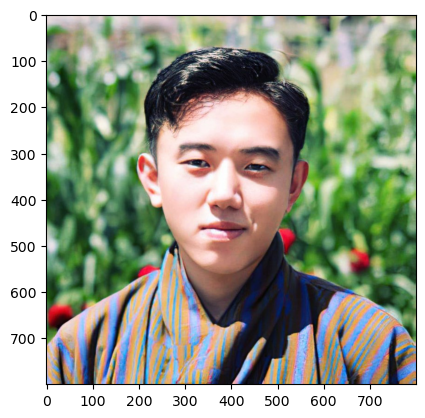

0 = 33.63%
1 = 66.37%
The predicted image is: 1


In [47]:
## After Using the hyperparameter tuning

from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Load the image
path = r"C:\Users\jetxu\Downloads\Gender\1.JPEG"
img = imread(path)

# Display the image
plt.imshow(img)
plt.show()

# Preprocess and resize the image
img_resize = resize(img, (150, 150, 3))

# Flatten the resized image array
l = [img_resize.flatten()]

# Predict class probabilities using the trained classifier
probability = random_search.best_estimator_.predict_proba(l)

# Display the predicted probabilities for each class
for ind, val in enumerate(random_search.best_estimator_.classes_):
    print(f'{val} = {probability[0][ind]*100:.2f}%')

# Get the predicted class
predicted_class = random_search.best_estimator_.classes_[probability.argmax()]
print("The predicted image is:", predicted_class)


## Logistic Regression

In [23]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

# Creating a Random Forest Classifier
logistic = LogisticRegression()

# Training the model
logistic.fit(x_train, y_train)

C:\Users\jetxu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Training set predictions and accuracy
train_predictions = logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Validation set predictions and accuracy
val_predictions = logistic.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Test set predictions and accuracy
test_predictions = logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9993055555555556
Validation Accuracy: 0.8732638888888888
Test Accuracy: 0.9305555555555556


In [25]:
# Testing the model using the testing data 
y_pred = rf_classifier.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 89.58333333333334% accurate


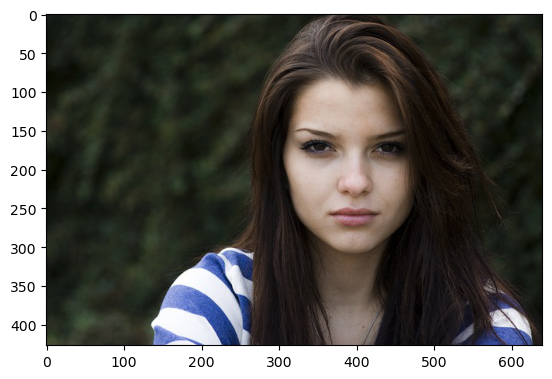

Female = 69.4629823754874%
Male = 30.53701762451259%
The predicted image is : Female


In [27]:
path=r"C:\Users\jetxu\Downloads\Gender\2.JPG"
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability= logistic.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[logistic.predict(l)[0]])

# Support Vector Machine

In [29]:
# Support Vector Regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)


In [30]:
from sklearn.svm import SVC

# Train the SVM model with a polynomial kernel and enable probability estimates
svm_model = SVC(kernel='poly', degree=3, C=1.0, probability=True)
svm_model.fit(x_train, y_train)



SVC(kernel='poly', probability=True)

In [31]:
# Evaluate the SVM model on the training set
svm_train_predictions = svm_model.predict(x_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"SVM Training Accuracy: {svm_train_accuracy*100:.2f}%")

# Evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(x_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print(f"SVM Validation Accuracy: {svm_val_accuracy*100:.2f}%")

# Evaluate the SVM model on the test set
svm_test_predictions = svm_model.predict(x_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"SVM Test Accuracy: {svm_test_accuracy*100:.2f}%")

SVM Training Accuracy: 99.17%
SVM Validation Accuracy: 89.24%
SVM Test Accuracy: 89.58%


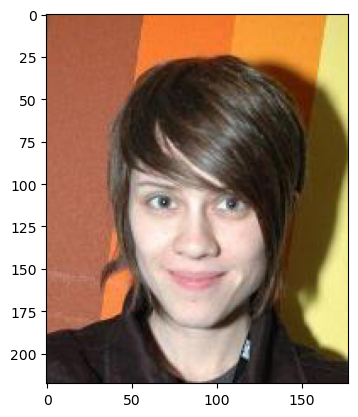

Female = 91.11772040101913%
Male = 8.882279598980867%
The predicted image is : Female


In [34]:
path=r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\160012.JPG"
img=imread(path) 
plt.imshow(img) 
plt.show() 

img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=svm_model.predict_proba(l) 
# Train the SVM model with a polynomial kernel and enable probability estimates

for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[svm_model.predict(l)[0]])

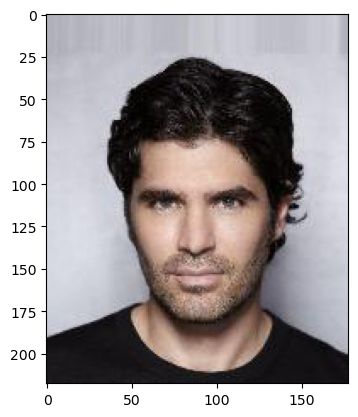

Female = 3.628206481104186e-05%
Male = 99.99996371793519%
The predicted image is : Male


In [35]:
path=r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\179978.JPG"
img=imread(path) 
plt.imshow(img) 
plt.show() 

img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=svm_model.predict_proba(l) 
# Train the SVM model with a polynomial kernel and enable probability estimates

for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[svm_model.predict(l)[0]])

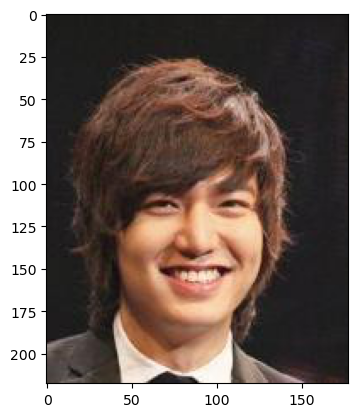

Female = 27.353679874442722%
Male = 72.64632012555727%
The predicted image is : Male


In [36]:
path=r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\160158.JPG"
img=imread(path) 
plt.imshow(img) 
plt.show() 

img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=svm_model.predict_proba(l) 
# Train the SVM model with a polynomial kernel and enable probability estimates

for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[svm_model.predict(l)[0]])

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid
param_grid = {
    'svm__kernel': ['linear'],
    'svm__C': [0.1, 1],
}

# Define the SVM pipeline with StandardScaler
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Initialize GridSearchCV with reduced parameters and folds
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=2, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Best Score: 0.8784722222222222


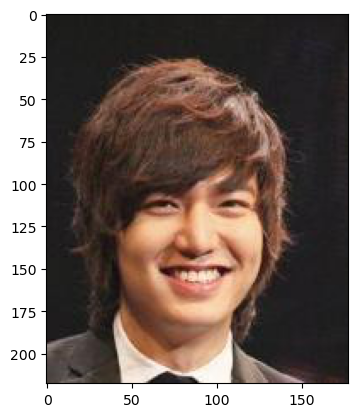

Female = 27.353679874442722%
Male = 72.64632012555727%
The predicted image is : Male


In [38]:
path=r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\160158.JPG"
img=imread(path) 
plt.imshow(img) 
plt.show() 

img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=svm_model.predict_proba(l) 
# Train the SVM model with a polynomial kernel and enable probability estimates

for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[svm_model.predict(l)[0]])

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

# Read the image
img = imread(r"C:\Users\jetxu\Downloads\Gender\1.JPEG")

# Display the original image
plt.imshow(img)
plt.show()

# Resize the image
img_resize = resize(img, (150, 150, 3))

# Flatten the resized image
l = [img_resize.flatten()]

# Get the prediction probability
probability = model.predict_proba(l)[0]  # Use predict_proba instead of predict

# Print the predicted probabilities for each class
for ind, val in enumerate(model.classes_):
    print(f'{val} = {probability[ind] * 100:.2f}%')

# Get the predicted class
predicted_class = model.classes_[np.argmax(probability)]

# Print the predicted class
print("The predicted image is : " + Categories[predicted_class])
  

In [41]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Categories = ['Female', 'Male']

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = imread(image_path)
    img_resized = resize(img, (150, 150, 3))
    return img_resized.flatten().reshape(1, -1)  # Reshape to 2D array for compatibility with Pipeline

# Define the pipeline
image_pipeline = Pipeline([
    ('preprocess', FunctionTransformer(load_and_preprocess_image)),
    ('scaler', StandardScaler()),  # Scaling not strictly necessary for RandomForest, but included for generalization
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [50, 100],  # Reduce the number of trees
    'classifier__max_depth': [None, 10],     # Limit the depth of trees
    'classifier__min_samples_split': [2, 5], # Adjust minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2]   # Adjust minimum samples required to be a leaf node
}


# Define paths to test images
test_image_paths = [
    r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\160012.JPG",
    r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\179978.JPG",
    r"C:\Users\jetxu\Downloads\Gender\Dataset\Test\160158.JPG"
]


    
# Fit the GridSearchCV instance with training data
grid_search.fit(X_train, y_train)

# Load test images and make predictions
for path in test_image_paths:
    img = imread(path)
    plt.imshow(img)
    plt.show()
    # Make predictions using the pipeline
    predicted_probs = grid_search.predict_proba([path])[0]
    for class_name, prob in zip(Categories, predicted_probs):
        print(f'{class_name}: {prob*100:.2f}%')
    predicted_class = Categories[np.argmax(predicted_probs)]
    print("Predicted Class:", predicted_class)


NameError: name 'X_train' is not defined